In [1]:
# importing the dataset #

import pandas as pd

df = pd.read_csv('memotion_dataset_7k/labels.csv')
df

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [2]:
df['text_corrected'].isnull().sum() ## 5 null values 

5

In [3]:
## Removing rows with Nan values ##

df.dropna(subset=['text_corrected', 'humour', 'sarcasm', 'offensive', 'motivational', 'overall_sentiment'], inplace=True)
df

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
...,...,...,...,...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,very_funny,twisted_meaning,very_offensive,motivational,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,funny,twisted_meaning,not_offensive,not_motivational,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,funny,general,slight,not_motivational,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,not_funny,twisted_meaning,not_offensive,motivational,very_positive


In [4]:
## Checking if all the images can be readable ##

import cv2

image_names = df.image_name.values

for img in image_names:
    img_tensor = cv2.imread('./memotion_dataset_7k/images/'+img)
    if img_tensor is not None:
        #print(img_tensor.shape)
        pass
    else:
        print(img)

image_1567.jpg
image_4924.jpg
image_5119.png
image_6357.jpg


In [5]:
## Dropping all four memes which are not readable ##

df = df[(df['image_name'] != 'image_1567.jpg') & (df['image_name'] !=  'image_4924.jpg') & (df['image_name'] != 'image_5119.png') & (df['image_name'] != 'image_6357.jpg')]

In [6]:
## Sanity check ##

## Checking if all the images can be readable ##

import cv2
import numpy as np

image_names = df.image_name.values
img_arr = []
for img in image_names:
    img_tensor = cv2.imread('./memotion_dataset_7k/images/'+img)
    if img_tensor is not None:
        img_tensor = cv2.resize(img_tensor,(224,224)) ## resizing to desired shape
        img_arr.append(img_tensor)
        pass
    else:
        print(img)
        
img_arr = np.array(img_arr)
print(img_arr.shape)

(6983, 224, 224, 3)


In [7]:
## Storing the cleaned dataset ##

df.to_csv('./data/pre_processed_data.csv',index=False)

In [ ]:
## Total image in the dataset - 6983 ##

In [ ]:
### Data Spliting ###

In [41]:
# Creating a dataframe with 20% values of original dataframe #
val_test_df = df.sample(frac = 0.2)
 
# Creating dataframe with rest of the 80% values #
train_df = df.drop(val_test_df.index)

In [42]:
# Creating a val and test df with 50% #

val_df = val_test_df.sample(frac = 0.5)
test_df = val_test_df.drop(val_df.index)

In [43]:
## Saving the files ##

train_df.to_csv('./data/train.csv', index='False')
val_df.to_csv('./data/val.csv', index='False')
test_df.to_csv('./data/test.csv',index='False')

In [1]:
## loading from the saved datasets ##

import pandas as pd

train_df = pd.read_csv('./data/train.csv')
val_df = pd.read_csv('./data/val.csv')
test_df = pd.read_csv('./data/test.csv')

In [2]:
## Getting data ##

# Get the lists of sentences and their labels #

sentences = train_df.text_corrected.values

image_names = train_df.image_name.values

label_humour = train_df.humour.values
label_sarcasm = train_df.sarcasm.values
label_offensive = train_df.offensive.values
label_motivational = train_df.motivational.values
label_overall_sentiment = train_df.overall_sentiment.values

In [3]:
# Converting the labels to integers #

import numpy as np

label_humour_val = []

for i in label_humour:
    if i == 'not_funny':
        label_humour_val.append(0)
    elif i == 'funny':
        label_humour_val.append(1)
    elif i == 'very_funny':
        label_humour_val.append(2)
    elif i == 'hilarious':
        label_humour_val.append(3)
        
        
        
label_sarcasm_val = []

for i in label_sarcasm:
    if i == 'not_sarcastic':
        label_sarcasm_val.append(0)
    elif i == 'general':
        label_sarcasm_val.append(1)
    elif i == 'twisted_meaning':
        label_sarcasm_val.append(2)
    elif i == 'very_twisted':
        label_sarcasm_val.append(3)
        
        
        
label_offensive_val = []

for i in label_offensive:
    if i == 'not_offensive':
        label_offensive_val.append(0)
    elif i == 'slight':
        label_offensive_val.append(1)
    elif i == 'very_offensive':
        label_offensive_val.append(2)
    elif i == 'hateful_offensive':
        label_offensive_val.append(3)
        
        
        
label_motivational_val = []

for i in label_motivational:
    if i == 'not_motivational':
        label_motivational_val.append(0)
    elif i == 'motivational':
        label_motivational_val.append(1)
        

label_overall_sentiment_val = []

for i in label_overall_sentiment:
    if i == 'very_negative':
        label_overall_sentiment_val.append(0)
    elif i == 'negative':
        label_overall_sentiment_val.append(1)
    elif i == 'neutral':
        label_overall_sentiment_val.append(2)
    elif i == 'positive':
        label_overall_sentiment_val.append(3)
    elif i == 'very_positive':
        label_overall_sentiment_val.append(4)
        
        
## Converting to numpy array ##
label_humour_val = np.array(label_humour_val)
label_sarcasm_val = np.array(label_sarcasm_val)
label_offensive_val = np.array(label_offensive_val)
label_motivational_val = np.array(label_motivational_val)
label_overall_sentiment_val = np.array(label_overall_sentiment_val)

## checking the dimensions -sanity check ##
print(len(label_humour_val))
print(len(label_sarcasm_val))
print(len(label_offensive_val))
print(len(label_motivational_val))
print(len(label_overall_sentiment_val))

5586
5586
5586
5586
5586


In [ ]:
## All the labels have same dimension ##

## Data Analysis ##

<AxesSubplot:xlabel='overall_sentiment'>

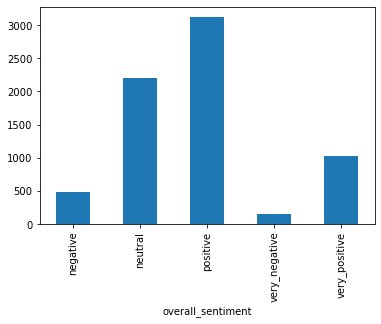

In [10]:
df.groupby(['overall_sentiment']).size().plot.bar()

<AxesSubplot:xlabel='motivational'>

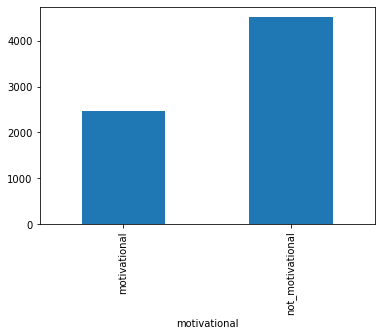

In [11]:
df.groupby(['motivational']).size().plot.bar()

<AxesSubplot:xlabel='offensive'>

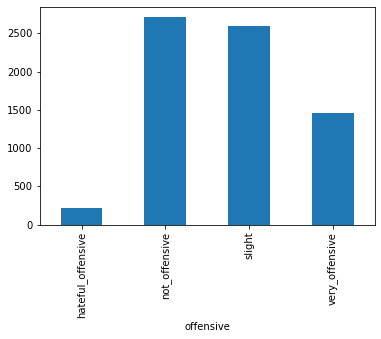

In [12]:
df.groupby(['offensive']).size().plot.bar()

<AxesSubplot:xlabel='humour'>

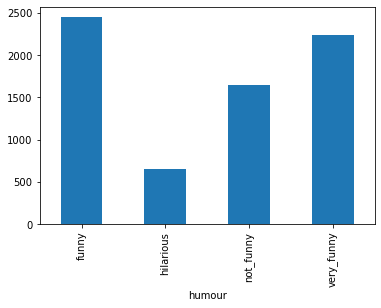

In [13]:
df.groupby(['humour']).size().plot.bar()

<AxesSubplot:xlabel='sarcasm'>

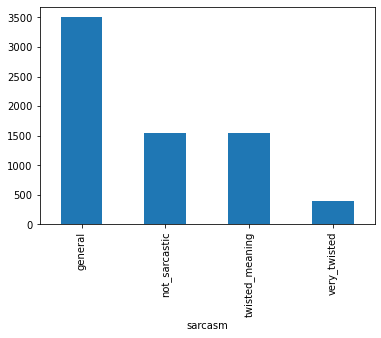

In [14]:
df.groupby(['sarcasm']).size().plot.bar()

In [15]:
## Checking the maximum length of the sentence ##

from transformers import DistilBertTokenizer

max_len = 0
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

for sent in sentences:
    # Tokenize the text and add [CLS] and [SEP] tokens #
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length#
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  261


## Creating the dataset ##

In [4]:
## Preprocessing the image ##

import torchvision.transforms as transforms
import cv2

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

preprocessed_image = []

for img in image_names:
    
    img_tensor = cv2.imread('./memotion_dataset_7k/images/'+img)
    img_tensor = cv2.resize(img_tensor,(224,224)) ## commonly used dimensison - 224
    img_tensor = cv2.cvtColor(img_tensor, cv2.COLOR_BGR2RGB) ## format used by pytorch
    # converting the type of pixel to float 32
    img_tensor = img_tensor.astype('float32')
    img_tensor = transform(img_tensor)
    preprocessed_image.append(img_tensor)

In [5]:
import torch
import numpy as np
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

class Dataset(torch.utils.data.Dataset):

    def __init__(self,df): ## here df is not used ##

        self.sentiment = [label for label in label_overall_sentiment_val] ## instead of having the lists here, the best option is use from dataframe like df['humour'] ##
        self.humour = [label for label in label_humour_val]
        self.sarcasm = [label for label in label_sarcasm_val]
        self.offensive = [label for label in label_offensive_val]
        self.motivational = [label for label in label_motivational_val]
        
        
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 280, truncation=True,
                                return_tensors="pt") for text in sentences] # Since maximum length is 261 # 
        self.image_name = [name for name in image_names]
        self.images = [img for img in preprocessed_image]
                                                                            
    def classes(self):
        return self.sentiment

    def __len__(self):
        return len(self.sentiment)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.sentiment[idx]), np.array(self.humour[idx]), np.array(self.sarcasm[idx]), np.array(self.offensive[idx]), np.array(self.motivational[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of input texts
        return self.texts[idx]
    
    def get_batch_images(self, idx):
        # Fetch a batch of input images
        return self.images[idx]
    
    def get_batch_image_names(self, idx):
        # Fetch a batch of input images
        return self.image_name[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_images = self.get_batch_images(idx)
        batch_image_names = self.get_batch_image_names(idx)
        
        batch_y_sentiment, batch_y_humour, batch_y_sarcasm, batch_y_offensive, batch_y_motivational = self.get_batch_labels(idx)

        return batch_texts, batch_images, batch_image_names, batch_y_sentiment, batch_y_humour, batch_y_sarcasm, batch_y_offensive, batch_y_motivational

In [35]:
## Spliting the data into train, val and test ##

# np.random.seed(112)
# df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df)), int(.9*len(df))])

# print(len(df_train),len(df_val), len(df_test)) ## Data split - train:val:test = 80:10:10 ##

5586 698 699


In [8]:
len(train_dataloader)

1397

In [7]:
len(train)

5586

In [6]:
## Train dataset and dataloader ##

train = Dataset(train_df)
train_dataloader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True) #batch size = 4

In [9]:
### validation ###

## Getting data ##

# Get the lists of sentences and their labels.
sentences = val_df.text_corrected.values

image_names = val_df.image_name.values

label_humour = val_df.humour.values
label_sarcasm = val_df.sarcasm.values
label_offensive = val_df.offensive.values
label_motivational = val_df.motivational.values
label_overall_sentiment = val_df.overall_sentiment.values

# Converting the labels to integers #

import numpy as np

label_humour_val = []

for i in label_humour:
    if i == 'not_funny':
        label_humour_val.append(0)
    elif i == 'funny':
        label_humour_val.append(1)
    elif i == 'very_funny':
        label_humour_val.append(2)
    elif i == 'hilarious':
        label_humour_val.append(3)
        
        
        
label_sarcasm_val = []

for i in label_sarcasm:
    if i == 'not_sarcastic':
        label_sarcasm_val.append(0)
    elif i == 'general':
        label_sarcasm_val.append(1)
    elif i == 'twisted_meaning':
        label_sarcasm_val.append(2)
    elif i == 'very_twisted':
        label_sarcasm_val.append(3)
        
        
        
label_offensive_val = []

for i in label_offensive:
    if i == 'not_offensive':
        label_offensive_val.append(0)
    elif i == 'slight':
        label_offensive_val.append(1)
    elif i == 'very_offensive':
        label_offensive_val.append(2)
    elif i == 'hateful_offensive':
        label_offensive_val.append(3)
        
        
        
label_motivational_val = []

for i in label_motivational:
    if i == 'not_motivational':
        label_motivational_val.append(0)
    elif i == 'motivational':
        label_motivational_val.append(1)
        

label_overall_sentiment_val = []

for i in label_overall_sentiment:
    if i == 'very_negative':
        label_overall_sentiment_val.append(0)
    elif i == 'negative':
        label_overall_sentiment_val.append(1)
    elif i == 'neutral':
        label_overall_sentiment_val.append(2)
    elif i == 'positive':
        label_overall_sentiment_val.append(3)
    elif i == 'very_positive':
        label_overall_sentiment_val.append(4)
        
        
## Converting to numpy array ##
label_humour_val = np.array(label_humour_val)
label_sarcasm_val = np.array(label_sarcasm_val)
label_offensive_val = np.array(label_offensive_val)
label_motivational_val = np.array(label_motivational_val)
label_overall_sentiment_val = np.array(label_overall_sentiment_val)

## checking the dimensions -sanity check ##
print(len(label_humour_val))
print(len(label_sarcasm_val))
print(len(label_offensive_val))
print(len(label_motivational_val))
print(len(label_overall_sentiment_val))


## Preprocessing the image ##

import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

preprocessed_image = []

for img in image_names:
    
    img_tensor = cv2.imread('./memotion_dataset_7k/images/'+img)
    img_tensor = cv2.resize(img_tensor,(224,224)) ## commonly used dimensison - 224
    img_tensor = cv2.cvtColor(img_tensor, cv2.COLOR_BGR2RGB) ## format used by pytorch
    # converting the type of pixel to float 32
    img_tensor = img_tensor.astype('float32')
    img_tensor = transform(img_tensor)
    preprocessed_image.append(img_tensor)

698
698
698
698
698


In [10]:
## Val dataset and dataloader ##

val = Dataset(val_df)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=4)

print(len(val))
print(len(val_dataloader))

698
175


In [11]:
### Testing ###

## Getting data ##

# Get the lists of sentences and their labels.
sentences = test_df.text_corrected.values

image_names = test_df.image_name.values

label_humour = test_df.humour.values
label_sarcasm = test_df.sarcasm.values
label_offensive = test_df.offensive.values
label_motivational = test_df.motivational.values
label_overall_sentiment = test_df.overall_sentiment.values

# Converting the labels to integers #

import numpy as np

label_humour_val = []

for i in label_humour:
    if i == 'not_funny':
        label_humour_val.append(0)
    elif i == 'funny':
        label_humour_val.append(1)
    elif i == 'very_funny':
        label_humour_val.append(2)
    elif i == 'hilarious':
        label_humour_val.append(3)
        
        
        
label_sarcasm_val = []

for i in label_sarcasm:
    if i == 'not_sarcastic':
        label_sarcasm_val.append(0)
    elif i == 'general':
        label_sarcasm_val.append(1)
    elif i == 'twisted_meaning':
        label_sarcasm_val.append(2)
    elif i == 'very_twisted':
        label_sarcasm_val.append(3)
        
        
        
label_offensive_val = []

for i in label_offensive:
    if i == 'not_offensive':
        label_offensive_val.append(0)
    elif i == 'slight':
        label_offensive_val.append(1)
    elif i == 'very_offensive':
        label_offensive_val.append(2)
    elif i == 'hateful_offensive':
        label_offensive_val.append(3)
        
        
        
label_motivational_val = []

for i in label_motivational:
    if i == 'not_motivational':
        label_motivational_val.append(0)
    elif i == 'motivational':
        label_motivational_val.append(1)
        

label_overall_sentiment_val = []

for i in label_overall_sentiment:
    if i == 'very_negative':
        label_overall_sentiment_val.append(0)
    elif i == 'negative':
        label_overall_sentiment_val.append(1)
    elif i == 'neutral':
        label_overall_sentiment_val.append(2)
    elif i == 'positive':
        label_overall_sentiment_val.append(3)
    elif i == 'very_positive':
        label_overall_sentiment_val.append(4)
        
        
## Converting to numpy array ##
label_humour_val = np.array(label_humour_val)
label_sarcasm_val = np.array(label_sarcasm_val)
label_offensive_val = np.array(label_offensive_val)
label_motivational_val = np.array(label_motivational_val)
label_overall_sentiment_val = np.array(label_overall_sentiment_val)

## checking the dimensions -sanity check ##
print(len(label_humour_val))
print(len(label_sarcasm_val))
print(len(label_offensive_val))
print(len(label_motivational_val))
print(len(label_overall_sentiment_val))


## Preprocessing the image ##

import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

preprocessed_image = []

for img in image_names:
    
    img_tensor = cv2.imread('./memotion_dataset_7k/images/'+img)
    img_tensor = cv2.resize(img_tensor,(224,224)) ## commonly used dimensison - 224
    img_tensor = cv2.cvtColor(img_tensor, cv2.COLOR_BGR2RGB) ## format used by pytorch
    # converting the type of pixel to float 32
    img_tensor = img_tensor.astype('float32')
    img_tensor = transform(img_tensor)
    preprocessed_image.append(img_tensor)

699
699
699
699
699


In [12]:
## Test dataset and dataloader ##

test = Dataset(test_df)
test_dataloader = torch.utils.data.DataLoader(test, batch_size=4)

print(len(val))
print(len(val_dataloader))

698
175


In [13]:
from torch.optim import Adam
from tqdm import tqdm
from torch import nn

# train = Dataset(df_train)
# val = Dataset(df_val)
# test = Dataset(df_test)

# train_dataloader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True)
# val_dataloader = torch.utils.data.DataLoader(val, batch_size=4)
# test_dataloader = torch.utils.data.DataLoader(test, batch_size=4) #batch size = 4

# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()

#lr = 1e-3
#optimizer = Adam(model.parameters(), lr= 1e-3)

In [18]:
## Sanity check: dataloaders ##

next(iter(train_dataloader))

[{'input_ids': tensor([[[  101,  2115,  4299,  ...,     0,     0,     0]],
  
          [[  101,  9413, 29038,  ...,     0,     0,     0]],
  
          [[  101,  4152,  3140,  ...,     0,     0,     0]],
  
          [[  101,  2043,  2619,  ...,     0,     0,     0]]]),
  'attention_mask': tensor([[[1, 1, 1,  ..., 0, 0, 0]],
  
          [[1, 1, 1,  ..., 0, 0, 0]],
  
          [[1, 1, 1,  ..., 0, 0, 0]],
  
          [[1, 1, 1,  ..., 0, 0, 0]]])},
 tensor([[[[163., 163., 153.,  ..., 135., 111., 109.],
           [169., 167., 169.,  ..., 143., 143., 145.],
           [213., 203., 181.,  ..., 123., 143., 155.],
           ...,
           [357., 361., 377.,  ..., 203., 213., 193.],
           [ 95., 101., 111.,  ..., 213., 215., 243.],
           [ 47.,  55.,  49.,  ..., 201., 233., 237.]],
 
          [[187., 183., 173.,  ..., 125.,  95.,  93.],
           [193., 187., 189.,  ..., 131., 127., 129.],
           [237., 223., 201.,  ..., 113., 127., 139.],
           ...,
           [355.

In [14]:
class EarlyStopping():
    def __init__(self, patience=3, min_delta=0):

        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, prev_val_loss, validation_loss):
        if (validation_loss - prev_val_loss) >= self.min_delta:
            self.counter +=1
            print('Early stopping counter value: ', self.counter)
            if self.counter >= self.patience:  
                self.early_stop = True
                
## Ref: https://stackoverflow.com/questions/71998978/early-stopping-in-pytorch ##

The experiment is conducted in three different settings:

    1) Text-only analysis

    2) Image-only analysis

    3) Multimodal analysis (Text+image)

## Text-only analysis

In [15]:
from torch import nn
from transformers import DistilBertModel

class DistilBertClassifier(nn.Module):

    def __init__(self, dropout=0.1):
        super(DistilBertClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.dropout = nn.Dropout(dropout)
        self.pre_classifier = nn.Linear(768, 768)
        self.relu = nn.ReLU()
        self.classifier_humour = nn.Linear(768, 4)
        self.classifier_sarcasm = nn.Linear(768, 4)
        self.classifier_offensive = nn.Linear(768, 4)
        self.classifier_motivational = nn.Linear(768, 2)
        self.classifier_sentiment = nn.Linear(768, 5)

    def forward(self, input_id, mask):

        distilbert_output = self.distilbert(input_ids= input_id, attention_mask=mask,return_dict=False)
        
        hidden_state = distilbert_output[0]  # (bs, seq_len, dim)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        
        pooled_output = self.pre_classifier(pooled_output)  # (bs, dim)
        pooled_output = self.relu(pooled_output)  # (bs, dim)
        pooled_output = self.dropout(pooled_output)  # (bs, dim)
        
        logits_humour = self.classifier_humour(pooled_output)  # (bs, num_labels)
        logits_sarcasm = self.classifier_sarcasm(pooled_output)
        logits_offensive = self.classifier_offensive(pooled_output)
        logits_motivational = self.classifier_motivational(pooled_output)
        logits_sentiment = self.classifier_sentiment(pooled_output)

        return logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment

In [16]:
model = DistilBertClassifier().to(device)
criterion = criterion.to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
model

DistilBertClassifier(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Li

In [18]:
from torch.optim import Adam
from tqdm import tqdm


def train(model, train_dataloader, val_dataloader, epochs, criterion, optimizer, device):
    
    prev_val_loss = 0
    
    ## Tracking the accuracy and losses for plotting ##
    
    train_loss_tracker = []
    val_loss_tracker = []
    
    train_value_tracker = {'humour':[], 'sarcasm': [], 'off':[], 'moti':[], 'senti':[]}
    val_value_tracker = {'humour':[], 'sarcasm': [], 'off':[], 'moti':[], 'senti':[]}
            
    early_stopping = EarlyStopping()
    
    #model = model.to(device)
    model.train()
    
    for epoch_num in range(epochs):
        train_items_total = 0
        val_items_total = 0
    
        total_acc_train_humour = 0
        total_acc_train_sarcasm = 0
        total_acc_train_off = 0
        total_acc_train_moti = 0
        total_acc_train_senti = 0

        total_acc_val_humour = 0
        total_acc_val_sarcasm = 0
        total_acc_val_off = 0
        total_acc_val_moti = 0
        total_acc_val_senti = 0

        total_loss_val = 0
        total_loss_train = 0

        for train_input, _, _, train_label_sentiment, train_label_humour, train_label_sarcasm, train_label_offensive, train_label_motivational in tqdm(train_dataloader):

            train_label_sentiment = train_label_sentiment.to(device)
            train_label_humour = train_label_humour.to(device)
            train_label_sarcasm = train_label_sarcasm.to(device)
            train_label_offensive = train_label_offensive.to(device)
            train_label_motivational = train_label_motivational.to(device)

            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            model=model.to(device) ## don't comment this line -- very important

            logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(input_id, mask)
            #print(output.shape)
            #print(train_label.long().shape)
            ##print(train_label.reshape(2,1).long().shape)

            batch_loss = criterion(logits_humour, train_label_humour.long()) + criterion(logits_sarcasm, train_label_sarcasm.long()) + criterion(logits_offensive, train_label_offensive.long()) + criterion(logits_motivational, train_label_motivational.long()) + criterion(logits_sentiment, train_label_sentiment.long())
            total_loss_train += batch_loss.item()

            acc_humour = (logits_humour.argmax(dim=1) == train_label_humour).sum().item()
            total_acc_train_humour += acc_humour
#             print(total_acc_train_humour)
#             print(acc_humour)

            acc_sarcasm = (logits_sarcasm.argmax(dim=1) == train_label_sarcasm).sum().item()
            total_acc_train_sarcasm += acc_sarcasm

            acc_off = (logits_offensive.argmax(dim=1) == train_label_offensive).sum().item()
            total_acc_train_off += acc_off

            acc_moti = (logits_motivational.argmax(dim=1) == train_label_motivational).sum().item()
            total_acc_train_moti += acc_moti

            acc_senti = (logits_sentiment.argmax(dim=1) == train_label_sentiment).sum().item()
            total_acc_train_senti += acc_senti
            
            ## number of training items in each batch ##
            train_items_total += train_label_humour.shape[0]
            #print(train_label_humour.shape[0])

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        ## Eval ##

        model.eval()
        for val_input, _, _, val_label_sentiment, val_label_humour, val_label_sarcasm, val_label_offensive, val_label_motivational in val_dataloader:

            val_label_sentiment = val_label_sentiment.to(device)
            val_label_humour = val_label_humour.to(device)
            val_label_sarcasm = val_label_sarcasm.to(device)
            val_label_offensive = val_label_offensive.to(device)
            val_label_motivational = val_label_motivational.to(device)

            mask = val_input['attention_mask'].to(device)
            input_id = val_input['input_ids'].squeeze(1).to(device)

            with torch.no_grad():
                logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(input_id, mask)

            batch_loss = criterion(logits_humour, val_label_humour.long()) + criterion(logits_sarcasm, val_label_sarcasm.long()) + criterion(logits_offensive, val_label_offensive.long()) + criterion(logits_motivational, val_label_motivational.long()) + criterion(logits_sentiment, val_label_sentiment.long())
            total_loss_val += batch_loss.item()

            acc_humour = (logits_humour.argmax(dim=1) == val_label_humour).sum().item()
            total_acc_val_humour += acc_humour
            #print(total_acc_val_humour)

            acc_sarcasm = (logits_sarcasm.argmax(dim=1) == val_label_sarcasm).sum().item()
            total_acc_val_sarcasm += acc_sarcasm

            acc_off = (logits_offensive.argmax(dim=1) == val_label_offensive).sum().item()
            total_acc_val_off += acc_off

            acc_moti = (logits_motivational.argmax(dim=1) == val_label_motivational).sum().item()
            total_acc_val_moti += acc_moti

            acc_senti = (logits_sentiment.argmax(dim=1) == val_label_sentiment).sum().item()
            total_acc_val_senti += acc_senti
            
            ## number of validation items in each batch ##
            val_items_total += val_label_humour.shape[0]

        print(
            f'Epochs: {epoch_num + 1} \n | Train Loss: {total_loss_train / train_items_total: .3f} \n\n \
            | Train Accuracy (Humour): {total_acc_train_humour / train_items_total: .3f} \n \
            | Train Accuracy (Sarcasm): {total_acc_train_sarcasm / train_items_total: .3f} \n \
            | Train Accuracy (Offensive): {total_acc_train_off / train_items_total: .3f} \n \
            | Train Accuracy (Motivational): {total_acc_train_moti / train_items_total: .3f} \n \
            | Train Accuracy (Overall Sentiment): {total_acc_train_senti / train_items_total: .3f} \n \n \n \
            | Val Loss: {total_loss_val / val_items_total: .3f} \n\n \
            | Val Accuracy (Humour): {total_acc_val_humour / val_items_total: .3f} \n\
            | Val Accuracy (Sarcasm): {total_acc_val_sarcasm / val_items_total: .3f} \n\
            | Val Accuracy (Offensive): {total_acc_val_off / val_items_total: .3f} \n\
            | Val Accuracy (Motivational): {total_acc_val_moti / val_items_total: .3f} \n\
            | Val Accuracy (Overall Sentiment): {total_acc_val_senti / val_items_total: .3f} \n\n\n')

        ## Adding to the list for plotting ##
        train_loss_tracker.append(total_loss_train / train_items_total) 
        val_loss_tracker.append(total_loss_val / val_items_total)

        train_value_tracker['humour'].append(total_acc_train_humour / train_items_total)
        train_value_tracker['sarcasm'].append(total_acc_train_sarcasm / train_items_total)
        train_value_tracker['off'].append(total_acc_train_off / train_items_total)
        train_value_tracker['moti'].append(total_acc_train_moti / train_items_total)
        train_value_tracker['senti'].append(total_acc_train_senti / train_items_total)

        val_value_tracker['humour'].append(total_acc_val_humour / val_items_total)
        val_value_tracker['sarcasm'].append(total_acc_val_sarcasm / val_items_total)
        val_value_tracker['off'].append(total_acc_val_off / val_items_total)
        val_value_tracker['moti'].append(total_acc_val_moti / val_items_total)
        val_value_tracker['senti'].append(total_acc_val_senti / val_items_total)


        ## Early stopping ##

        if epoch_num != 0:
            early_stopping(prev_val_loss, total_loss_val / val_items_total)
            #prev_val_loss = total_loss_val / val_items_total
            
            current_val_loss = total_loss_val / val_items_total ## updated
            if current_val_loss < prev_val_loss: # if current value is less than the previous value
                prev_val_loss = current_val_loss

        elif epoch_num == 0:
            prev_val_loss = total_loss_val / val_items_total

        if early_stopping.early_stop:
            print("Training stopped at epoch:", epoch_num+1)
            break
                    
    return train_loss_tracker, val_loss_tracker, train_value_tracker, val_value_tracker

In [19]:
epochs = 10
model = DistilBertClassifier()
lr = 1e-4

optimizer = Adam(model.parameters(), lr= lr)

train_loss_tracker, val_loss_tracker, train_value_tracker, val_value_tracker = train(model, train_dataloader, val_dataloader, epochs, criterion, optimizer, device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:29<00:00,  4.24it/s]


Epochs: 1 
 | Train Loss:  1.414 

             | Train Accuracy (Humour):  0.331 
             | Train Accuracy (Sarcasm):  0.493 
             | Train Accuracy (Offensive):  0.374 
             | Train Accuracy (Motivational):  0.639 
             | Train Accuracy (Overall Sentiment):  0.432 
 
 
             | Val Loss:  1.401 

             | Val Accuracy (Humour):  0.305 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:34<00:00,  4.17it/s]


Epochs: 2 
 | Train Loss:  1.402 

             | Train Accuracy (Humour):  0.334 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.385 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.446 
 
 
             | Val Loss:  1.387 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:33<00:00,  4.19it/s]


Epochs: 3 
 | Train Loss:  1.402 

             | Train Accuracy (Humour):  0.340 
             | Train Accuracy (Sarcasm):  0.498 
             | Train Accuracy (Offensive):  0.373 
             | Train Accuracy (Motivational):  0.645 
             | Train Accuracy (Overall Sentiment):  0.447 
 
 
             | Val Loss:  1.385 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:34<00:00,  4.17it/s]


Epochs: 4 
 | Train Loss:  1.397 

             | Train Accuracy (Humour):  0.343 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.386 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.386 

             | Val Accuracy (Humour):  0.305 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  1


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:34<00:00,  4.18it/s]


Epochs: 5 
 | Train Loss:  1.397 

             | Train Accuracy (Humour):  0.346 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.380 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.380 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:34<00:00,  4.17it/s]


Epochs: 6 
 | Train Loss:  1.397 

             | Train Accuracy (Humour):  0.337 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.390 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.380 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:34<00:00,  4.17it/s]


Epochs: 7 
 | Train Loss:  1.396 

             | Train Accuracy (Humour):  0.343 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.382 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.381 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  2


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:35<00:00,  4.17it/s]


Epochs: 8 
 | Train Loss:  1.396 

             | Train Accuracy (Humour):  0.340 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.378 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.378 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.394 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [05:35<00:00,  4.17it/s]


Epochs: 9 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.347 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.378 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.379 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  3
Training stopped at epoch: 9


In [20]:
## Counting the number of model parameters ##

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of parameters : ', count_parameters(model))

Number of parameters :  66968083


In [21]:
from sklearn.metrics import classification_report

def test(model, test_dataloader, criterion, optimizer, device):
    total_acc_test_humour = 0
    total_acc_test_sarcasm = 0
    total_acc_test_off = 0
    total_acc_test_moti = 0
    total_acc_test_senti = 0

    total_loss_test = 0
    
    ## total test items in a dataloader ##
    test_items_total = 0
    
    model = model.to(device)
    model.eval()
    
    img_lst =[]
    predicted_labels_lst_hum=[]
    orig_labels_lst_hum=[]
    
    predicted_labels_lst_sar=[]
    orig_labels_lst_sar=[]
    
    predicted_labels_lst_moti=[]
    orig_labels_lst_moti=[]
    
    predicted_labels_lst_off=[]
    orig_labels_lst_off=[]
    
    predicted_labels_lst_senti=[]
    orig_labels_lst_senti=[]
    
    for test_input, img_input, img_names, test_label_sentiment, test_label_humour, test_label_sarcasm, test_label_offensive, test_label_motivational in test_dataloader:
        test_label_sentiment = test_label_sentiment.to(device)
        test_label_humour = test_label_humour.to(device)
        test_label_sarcasm = test_label_sarcasm.to(device)
        test_label_offensive = test_label_offensive.to(device)
        test_label_motivational = test_label_motivational.to(device)

        mask = test_input['attention_mask'].to(device)
        input_id = test_input['input_ids'].squeeze(1).to(device)

        with torch.no_grad():
            logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(input_id, mask)
            
        img_lst.extend(list(img_names))
#         print(test_label_sentiment.tolist())
#         print(logits_humour.argmax(dim=1).tolist())
#         print(img_names)
        
        predicted_labels_lst_hum.extend(logits_humour.argmax(dim=1).tolist())
        orig_labels_lst_hum.extend(test_label_humour.tolist())
        
        predicted_labels_lst_sar.extend(logits_sarcasm.argmax(dim=1).tolist())
        orig_labels_lst_sar.extend(test_label_sarcasm.tolist())

        predicted_labels_lst_moti.extend(logits_motivational.argmax(dim=1).tolist())
        orig_labels_lst_moti.extend(test_label_motivational.tolist())

        predicted_labels_lst_off.extend(logits_offensive.argmax(dim=1).tolist())
        orig_labels_lst_off.extend(test_label_offensive.tolist())

        predicted_labels_lst_senti.extend(logits_sentiment.argmax(dim=1).tolist())
        orig_labels_lst_senti.extend(test_label_sentiment.tolist())
        
        batch_loss = criterion(logits_humour, test_label_humour.long()) + criterion(logits_sarcasm, test_label_sarcasm.long()) + criterion(logits_offensive, test_label_offensive.long()) + criterion(logits_motivational, test_label_motivational.long()) + criterion(logits_sentiment, test_label_sentiment.long())
        total_loss_test += batch_loss.item()

        acc_humour = (logits_humour.argmax(dim=1) == test_label_humour).sum().item()
        total_acc_test_humour += acc_humour

        acc_sarcasm = (logits_sarcasm.argmax(dim=1) == test_label_sarcasm).sum().item()
        total_acc_test_sarcasm += acc_sarcasm

        acc_off = (logits_offensive.argmax(dim=1) == test_label_offensive).sum().item()
        total_acc_test_off += acc_off

        acc_moti = (logits_motivational.argmax(dim=1) == test_label_motivational).sum().item()
        total_acc_test_moti += acc_moti

        acc_senti = (logits_sentiment.argmax(dim=1) == test_label_sentiment).sum().item()
        total_acc_test_senti += acc_senti
        
        ## number of test items in each batch ##
        test_items_total += test_label_humour.shape[0]

    print(
        f'| Test Loss: {total_loss_test / test_items_total: .3f} \n\n \
        | Test Accuracy (Humour): {total_acc_test_humour / test_items_total: .3f} \n\
        | Test Accuracy (Sarcasm): {total_acc_test_sarcasm / test_items_total: .3f} \n\
        | Test Accuracy (Offensive): {total_acc_test_off / test_items_total: .3f} \n\
        | Test Accuracy (Motivational): {total_acc_test_moti / test_items_total: .3f} \n\
        | Test Accuracy (Overall Sentiment): {total_acc_test_senti / test_items_total: .3f} \n\n\n')
    
    print('\n\n*********************Classification report***************\n\n')
    print('Humour:')
    print(classification_report(orig_labels_lst_hum, predicted_labels_lst_hum))
    print('Sarcasm:')
    print(classification_report(orig_labels_lst_sar, predicted_labels_lst_sar))
    print('Offensive:')
    print(classification_report(orig_labels_lst_off, predicted_labels_lst_off))
    print('Motivational:')
    print(classification_report(orig_labels_lst_moti, predicted_labels_lst_moti))
    print('Overall Sentiment:')
    print(classification_report(orig_labels_lst_senti, predicted_labels_lst_senti))

In [32]:
test(model, test_dataloader, criterion, optimizer, device)

| Test Loss:  1.404 

         | Test Accuracy (Humour):  0.343 
        | Test Accuracy (Sarcasm):  0.484 
        | Test Accuracy (Offensive):  0.389 
        | Test Accuracy (Motivational):  0.654 
        | Test Accuracy (Overall Sentiment):  0.408 





*********************Classification report***************


Humour:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.34      1.00      0.51       240
           2       0.00      0.00      0.00       222
           3       0.00      0.00      0.00        75

    accuracy                           0.34       699
   macro avg       0.09      0.25      0.13       699
weighted avg       0.12      0.34      0.18       699

Sarcasm:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.48      1.00      0.65       338
           2       0.00      0.00      0.00       170
           3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
len(train_dataloader)

1746

In [22]:
### Saving the model ###

torch.save(model, './text_distilbert_model.pt')

## Charts 

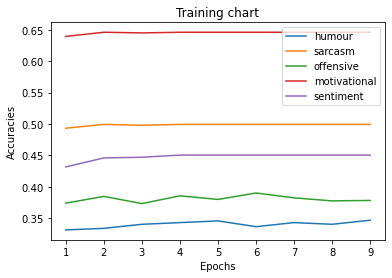

In [23]:
## plot the charts - Accuracies -Train ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_hum = train_value_tracker['humour'].copy()
y_pts_sar = train_value_tracker['sarcasm'].copy()
y_pts_off = train_value_tracker['off'].copy()
y_pts_moti = train_value_tracker['moti'].copy()
y_pts_senti = train_value_tracker['senti'].copy()

x_pts = [x for x in range(1,len(y_pts_hum)+1)]

plt.plot(x_pts,y_pts_hum)
plt.plot(x_pts,y_pts_sar)
plt.plot(x_pts,y_pts_off)
plt.plot(x_pts,y_pts_moti)
plt.plot(x_pts,y_pts_senti)

plt.title('Training chart')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(['humour', 'sarcasm', 'offensive', 'motivational', 'sentiment'])
plt.show()

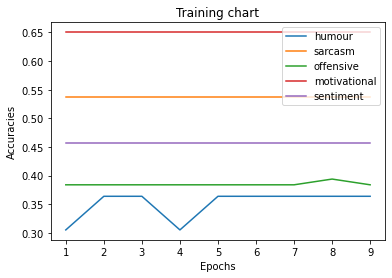

In [24]:
## plot the charts - Accuracies -Val ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_hum = val_value_tracker['humour'].copy()
y_pts_sar = val_value_tracker['sarcasm'].copy()
y_pts_off = val_value_tracker['off'].copy()
y_pts_moti = val_value_tracker['moti'].copy()
y_pts_senti = val_value_tracker['senti'].copy()

x_pts = [x for x in range(1,len(y_pts_hum)+1)]

plt.plot(x_pts,y_pts_hum)
plt.plot(x_pts,y_pts_sar)
plt.plot(x_pts,y_pts_off)
plt.plot(x_pts,y_pts_moti)
plt.plot(x_pts,y_pts_senti)

plt.title('Training chart')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(['humour', 'sarcasm', 'offensive', 'motivational', 'sentiment'])
plt.show()

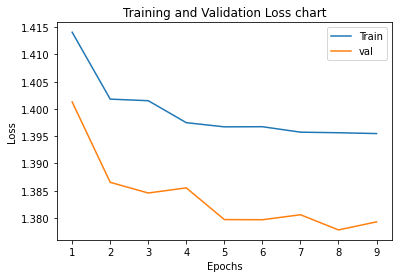

In [25]:
## plot the charts - loss - train -Val ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_loss_train = train_loss_tracker.copy()
y_pts_loss_val = val_loss_tracker.copy()
x_pts = [x for x in range(1,len(y_pts_loss_val)+1)]

plt.plot(x_pts,y_pts_loss_train)
plt.plot(x_pts,y_pts_loss_val)

plt.title('Training and Validation Loss chart')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'val'])
plt.show()

## Image-only analysis

In [36]:
from torch import nn
from torchvision import models
import torch.nn.functional as F


class ResnetClassifier(nn.Module):

    def __init__(self, dropout=0.1):
        super().__init__()
        self.resnet50 = models.resnet50(pretrained=True)
        self.resnet50.fc = nn.Sequential(
               nn.Linear(2048, 2048),
               nn.ReLU(inplace=True))
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.classifier_humour = nn.Linear(2048, 4)
        self.classifier_sarcasm = nn.Linear(2048, 4)
        self.classifier_offensive = nn.Linear(2048, 4)
        self.classifier_motivational = nn.Linear(2048, 2)
        self.classifier_sentiment = nn.Linear(2048, 5)

    def forward(self, x):
        x = self.resnet50(x) # (bs, dim) 
        x = self.relu(x)  # (bs, dim)
        x = self.dropout(x)  # (bs, dim)
        
        logits_humour = self.classifier_humour(x)  # (bs, num_labels)
        logits_sarcasm = self.classifier_sarcasm(x)
        logits_offensive = self.classifier_offensive(x)
        logits_motivational = self.classifier_motivational(x)
        logits_sentiment = self.classifier_sentiment(x)

        return logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment

In [37]:
model = ResnetClassifier().to(device)
criterion = criterion.to(device)

In [38]:
model

ResnetClassifier(
  (resnet50): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


In [41]:
## Counting the number of model parameters ##

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of parameters : ', count_parameters(model))

Number of parameters :  27743315


In [44]:
from torch.optim import Adam
from tqdm import tqdm


def train(model, train_dataloader, val_dataloader, epochs, criterion, optimizer, device):
    
    prev_val_loss = 0
    
    ## Tracking the accuracy and losses for plotting ##
    
    train_loss_tracker = []
    val_loss_tracker = []
    
    train_value_tracker = {'humour':[], 'sarcasm': [], 'off':[], 'moti':[], 'senti':[]}
    val_value_tracker = {'humour':[], 'sarcasm': [], 'off':[], 'moti':[], 'senti':[]}
            
    early_stopping = EarlyStopping()
    
    #model = model.to(device)
    model.train()
    
    for epoch_num in range(epochs):
        train_items_total = 0
        val_items_total = 0
    
        total_acc_train_humour = 0
        total_acc_train_sarcasm = 0
        total_acc_train_off = 0
        total_acc_train_moti = 0
        total_acc_train_senti = 0

        total_acc_val_humour = 0
        total_acc_val_sarcasm = 0
        total_acc_val_off = 0
        total_acc_val_moti = 0
        total_acc_val_senti = 0

        total_loss_val = 0
        total_loss_train = 0

        for _, img_input, _, train_label_sentiment, train_label_humour, train_label_sarcasm, train_label_offensive, train_label_motivational in tqdm(train_dataloader):

            train_label_sentiment = train_label_sentiment.to(device)
            train_label_humour = train_label_humour.to(device)
            train_label_sarcasm = train_label_sarcasm.to(device)
            train_label_offensive = train_label_offensive.to(device)
            train_label_motivational = train_label_motivational.to(device)

            img_input = img_input.to(device)

            model=model.to(device) ## don't comment this line -- very important

            logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(img_input)
            #print(output.shape)
            #print(train_label.long().shape)
            ##print(train_label.reshape(2,1).long().shape)

            batch_loss = criterion(logits_humour, train_label_humour.long()) + criterion(logits_sarcasm, train_label_sarcasm.long()) + criterion(logits_offensive, train_label_offensive.long()) + criterion(logits_motivational, train_label_motivational.long()) + criterion(logits_sentiment, train_label_sentiment.long())
            total_loss_train += batch_loss.item()

            acc_humour = (logits_humour.argmax(dim=1) == train_label_humour).sum().item()
            total_acc_train_humour += acc_humour
#             print(total_acc_train_humour)
#             print(acc_humour)

            acc_sarcasm = (logits_sarcasm.argmax(dim=1) == train_label_sarcasm).sum().item()
            total_acc_train_sarcasm += acc_sarcasm

            acc_off = (logits_offensive.argmax(dim=1) == train_label_offensive).sum().item()
            total_acc_train_off += acc_off

            acc_moti = (logits_motivational.argmax(dim=1) == train_label_motivational).sum().item()
            total_acc_train_moti += acc_moti

            acc_senti = (logits_sentiment.argmax(dim=1) == train_label_sentiment).sum().item()
            total_acc_train_senti += acc_senti
            
            ## number of training items in each batch ##
            train_items_total += train_label_humour.shape[0]
            #print(train_label_humour.shape[0])

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        ## Eval ##

        model.eval()
        for _, img_input, _, val_label_sentiment, val_label_humour, val_label_sarcasm, val_label_offensive, val_label_motivational in val_dataloader:
            val_label_sentiment = val_label_sentiment.to(device)
            val_label_humour = val_label_humour.to(device)
            val_label_sarcasm = val_label_sarcasm.to(device)
            val_label_offensive = val_label_offensive.to(device)
            val_label_motivational = val_label_motivational.to(device)

            img_input = img_input.to(device)

            with torch.no_grad():
                logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(img_input)

            batch_loss = criterion(logits_humour, val_label_humour.long()) + criterion(logits_sarcasm, val_label_sarcasm.long()) + criterion(logits_offensive, val_label_offensive.long()) + criterion(logits_motivational, val_label_motivational.long()) + criterion(logits_sentiment, val_label_sentiment.long())
            total_loss_val += batch_loss.item()

            acc_humour = (logits_humour.argmax(dim=1) == val_label_humour).sum().item()
            total_acc_val_humour += acc_humour
            #print(total_acc_val_humour)

            acc_sarcasm = (logits_sarcasm.argmax(dim=1) == val_label_sarcasm).sum().item()
            total_acc_val_sarcasm += acc_sarcasm

            acc_off = (logits_offensive.argmax(dim=1) == val_label_offensive).sum().item()
            total_acc_val_off += acc_off

            acc_moti = (logits_motivational.argmax(dim=1) == val_label_motivational).sum().item()
            total_acc_val_moti += acc_moti

            acc_senti = (logits_sentiment.argmax(dim=1) == val_label_sentiment).sum().item()
            total_acc_val_senti += acc_senti
            
            ## number of validation items in each batch ##
            val_items_total += val_label_humour.shape[0]

        print(
            f'Epochs: {epoch_num + 1} \n | Train Loss: {total_loss_train / train_items_total: .3f} \n\n \
            | Train Accuracy (Humour): {total_acc_train_humour / train_items_total: .3f} \n \
            | Train Accuracy (Sarcasm): {total_acc_train_sarcasm / train_items_total: .3f} \n \
            | Train Accuracy (Offensive): {total_acc_train_off / train_items_total: .3f} \n \
            | Train Accuracy (Motivational): {total_acc_train_moti / train_items_total: .3f} \n \
            | Train Accuracy (Overall Sentiment): {total_acc_train_senti / train_items_total: .3f} \n \n \n \
            | Val Loss: {total_loss_val / val_items_total: .3f} \n\n \
            | Val Accuracy (Humour): {total_acc_val_humour / val_items_total: .3f} \n\
            | Val Accuracy (Sarcasm): {total_acc_val_sarcasm / val_items_total: .3f} \n\
            | Val Accuracy (Offensive): {total_acc_val_off / val_items_total: .3f} \n\
            | Val Accuracy (Motivational): {total_acc_val_moti / val_items_total: .3f} \n\
            | Val Accuracy (Overall Sentiment): {total_acc_val_senti / val_items_total: .3f} \n\n\n')

        ## Adding to the list for plotting ##
        train_loss_tracker.append(total_loss_train / train_items_total) 
        val_loss_tracker.append(total_loss_val / val_items_total)

        train_value_tracker['humour'].append(total_acc_train_humour / train_items_total)
        train_value_tracker['sarcasm'].append(total_acc_train_sarcasm / train_items_total)
        train_value_tracker['off'].append(total_acc_train_off / train_items_total)
        train_value_tracker['moti'].append(total_acc_train_moti / train_items_total)
        train_value_tracker['senti'].append(total_acc_train_senti / train_items_total)

        val_value_tracker['humour'].append(total_acc_val_humour / val_items_total)
        val_value_tracker['sarcasm'].append(total_acc_val_sarcasm / val_items_total)
        val_value_tracker['off'].append(total_acc_val_off / val_items_total)
        val_value_tracker['moti'].append(total_acc_val_moti / val_items_total)
        val_value_tracker['senti'].append(total_acc_val_senti / val_items_total)


        ## Early stopping ##

        if epoch_num != 0:
            early_stopping(prev_val_loss, total_loss_val / val_items_total)
            prev_val_loss = total_loss_val / val_items_total

        elif epoch_num == 0:
            prev_val_loss = total_loss_val / val_items_total

        if early_stopping.early_stop:
            print("Training stopped at epoch:", epoch_num+1)
            break
                    
    return train_loss_tracker, val_loss_tracker, train_value_tracker, val_value_tracker

In [45]:
epochs = 50
lr = 1e-3

optimizer = Adam(model.parameters(), lr= lr)

train_loss_tracker, val_loss_tracker, train_value_tracker, val_value_tracker = train(model, train_dataloader, val_dataloader, epochs, criterion, optimizer, device)

100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:33<00:00,  9.09it/s]


Epochs: 1 
 | Train Loss:  1.403 

             | Train Accuracy (Humour):  0.338 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.389 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.393 

             | Val Accuracy (Humour):  0.305 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:33<00:00,  9.10it/s]


Epochs: 2 
 | Train Loss:  1.397 

             | Train Accuracy (Humour):  0.342 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.378 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.382 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:36<00:00,  8.90it/s]


Epochs: 3 
 | Train Loss:  1.396 

             | Train Accuracy (Humour):  0.335 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.379 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.386 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  1


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:39<00:00,  8.76it/s]


Epochs: 4 
 | Train Loss:  1.396 

             | Train Accuracy (Humour):  0.344 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.384 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.384 

             | Val Accuracy (Humour):  0.305 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.394 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:39<00:00,  8.74it/s]


Epochs: 5 
 | Train Loss:  1.396 

             | Train Accuracy (Humour):  0.346 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.376 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.383 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:41<00:00,  8.65it/s]


Epochs: 6 
 | Train Loss:  1.396 

             | Train Accuracy (Humour):  0.343 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.379 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.380 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:41<00:00,  8.66it/s]


Epochs: 7 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.347 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.381 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.379 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:40<00:00,  8.70it/s]


Epochs: 8 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.352 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.391 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.378 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:38<00:00,  8.81it/s]


Epochs: 9 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.351 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.384 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.377 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:37<00:00,  8.85it/s]


Epochs: 10 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.345 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.376 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.384 

             | Val Accuracy (Humour):  0.305 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  2


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:37<00:00,  8.86it/s]


Epochs: 11 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.339 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.385 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.378 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:37<00:00,  8.85it/s]


Epochs: 12 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.346 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.380 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.379 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.394 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  3


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:37<00:00,  8.88it/s]


Epochs: 13 
 | Train Loss:  1.395 

             | Train Accuracy (Humour):  0.346 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.375 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.379 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  4


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [02:37<00:00,  8.89it/s]


Epochs: 14 
 | Train Loss:  1.394 

             | Train Accuracy (Humour):  0.348 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.382 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.379 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  5
Training stopped at epoch: 14


In [46]:
from sklearn.metrics import classification_report

def test(model, test_dataloader, criterion, optimizer, device):
    total_acc_test_humour = 0
    total_acc_test_sarcasm = 0
    total_acc_test_off = 0
    total_acc_test_moti = 0
    total_acc_test_senti = 0

    total_loss_test = 0
    
    ## total test items in a dataloader ##
    test_items_total = 0
    
    model = model.to(device)
    model.eval()
    
    img_lst =[]
    predicted_labels_lst_hum=[]
    orig_labels_lst_hum=[]
    
    predicted_labels_lst_sar=[]
    orig_labels_lst_sar=[]
    
    predicted_labels_lst_moti=[]
    orig_labels_lst_moti=[]
    
    predicted_labels_lst_off=[]
    orig_labels_lst_off=[]
    
    predicted_labels_lst_senti=[]
    orig_labels_lst_senti=[]
    
    for test_input, img_input, img_names, test_label_sentiment, test_label_humour, test_label_sarcasm, test_label_offensive, test_label_motivational in test_dataloader:
        test_label_sentiment = test_label_sentiment.to(device)
        test_label_humour = test_label_humour.to(device)
        test_label_sarcasm = test_label_sarcasm.to(device)
        test_label_offensive = test_label_offensive.to(device)
        test_label_motivational = test_label_motivational.to(device)

        img_input = img_input.to(device)

        with torch.no_grad():
            logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(img_input)
            
        img_lst.extend(list(img_names))
#         print(test_label_sentiment.tolist())
#         print(logits_humour.argmax(dim=1).tolist())
#         print(img_names)
        
        predicted_labels_lst_hum.extend(logits_humour.argmax(dim=1).tolist())
        orig_labels_lst_hum.extend(test_label_humour.tolist())
        
        predicted_labels_lst_sar.extend(logits_sarcasm.argmax(dim=1).tolist())
        orig_labels_lst_sar.extend(test_label_sarcasm.tolist())

        predicted_labels_lst_moti.extend(logits_motivational.argmax(dim=1).tolist())
        orig_labels_lst_moti.extend(test_label_motivational.tolist())

        predicted_labels_lst_off.extend(logits_offensive.argmax(dim=1).tolist())
        orig_labels_lst_off.extend(test_label_offensive.tolist())

        predicted_labels_lst_senti.extend(logits_sentiment.argmax(dim=1).tolist())
        orig_labels_lst_senti.extend(test_label_sentiment.tolist())
        
        batch_loss = criterion(logits_humour, test_label_humour.long()) + criterion(logits_sarcasm, test_label_sarcasm.long()) + criterion(logits_offensive, test_label_offensive.long()) + criterion(logits_motivational, test_label_motivational.long()) + criterion(logits_sentiment, test_label_sentiment.long())
        total_loss_test += batch_loss.item()

        acc_humour = (logits_humour.argmax(dim=1) == test_label_humour).sum().item()
        total_acc_test_humour += acc_humour

        acc_sarcasm = (logits_sarcasm.argmax(dim=1) == test_label_sarcasm).sum().item()
        total_acc_test_sarcasm += acc_sarcasm

        acc_off = (logits_offensive.argmax(dim=1) == test_label_offensive).sum().item()
        total_acc_test_off += acc_off

        acc_moti = (logits_motivational.argmax(dim=1) == test_label_motivational).sum().item()
        total_acc_test_moti += acc_moti

        acc_senti = (logits_sentiment.argmax(dim=1) == test_label_sentiment).sum().item()
        total_acc_test_senti += acc_senti
        
        ## number of test items in each batch ##
        test_items_total += test_label_humour.shape[0]

    print(
        f'| Test Loss: {total_loss_test / test_items_total: .3f} \n\n \
        | Test Accuracy (Humour): {total_acc_test_humour / test_items_total: .3f} \n\
        | Test Accuracy (Sarcasm): {total_acc_test_sarcasm / test_items_total: .3f} \n\
        | Test Accuracy (Offensive): {total_acc_test_off / test_items_total: .3f} \n\
        | Test Accuracy (Motivational): {total_acc_test_moti / test_items_total: .3f} \n\
        | Test Accuracy (Overall Sentiment): {total_acc_test_senti / test_items_total: .3f} \n\n\n')
    
    print('\n\n*********************Classification report***************\n\n')
    print('Humour:')
    print(classification_report(orig_labels_lst_hum, predicted_labels_lst_hum))
    print('Sarcasm:')
    print(classification_report(orig_labels_lst_sar, predicted_labels_lst_sar))
    print('Offensive:')
    print(classification_report(orig_labels_lst_off, predicted_labels_lst_off))
    print('Motivational:')
    print(classification_report(orig_labels_lst_moti, predicted_labels_lst_moti))
    print('Overall Sentiment:')
    print(classification_report(orig_labels_lst_senti, predicted_labels_lst_senti))

In [47]:
test(model, test_dataloader, criterion, optimizer, device)

| Test Loss:  1.404 

         | Test Accuracy (Humour):  0.343 
        | Test Accuracy (Sarcasm):  0.484 
        | Test Accuracy (Offensive):  0.389 
        | Test Accuracy (Motivational):  0.654 
        | Test Accuracy (Overall Sentiment):  0.408 





*********************Classification report***************


Humour:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.34      1.00      0.51       240
           2       0.00      0.00      0.00       222
           3       0.00      0.00      0.00        75

    accuracy                           0.34       699
   macro avg       0.09      0.25      0.13       699
weighted avg       0.12      0.34      0.18       699

Sarcasm:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.48      1.00      0.65       338
           2       0.00      0.00      0.00       170
           3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
### Saving the model ###

torch.save(model, './image_resnet50_model.pt')

In [ ]:
### Charts ####

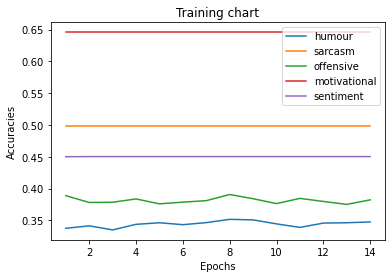

In [49]:
## plot the charts - Accuracies -Train ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_hum = train_value_tracker['humour'].copy()
y_pts_sar = train_value_tracker['sarcasm'].copy()
y_pts_off = train_value_tracker['off'].copy()
y_pts_moti = train_value_tracker['moti'].copy()
y_pts_senti = train_value_tracker['senti'].copy()

x_pts = [x for x in range(1,len(y_pts_hum)+1)]

plt.plot(x_pts,y_pts_hum)
plt.plot(x_pts,y_pts_sar)
plt.plot(x_pts,y_pts_off)
plt.plot(x_pts,y_pts_moti)
plt.plot(x_pts,y_pts_senti)

plt.title('Training chart')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(['humour', 'sarcasm', 'offensive', 'motivational', 'sentiment'])
plt.show()

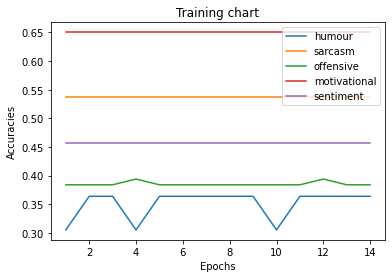

In [50]:
## plot the charts - Accuracies -Val ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_hum = val_value_tracker['humour'].copy()
y_pts_sar = val_value_tracker['sarcasm'].copy()
y_pts_off = val_value_tracker['off'].copy()
y_pts_moti = val_value_tracker['moti'].copy()
y_pts_senti = val_value_tracker['senti'].copy()

x_pts = [x for x in range(1,len(y_pts_hum)+1)]

plt.plot(x_pts,y_pts_hum)
plt.plot(x_pts,y_pts_sar)
plt.plot(x_pts,y_pts_off)
plt.plot(x_pts,y_pts_moti)
plt.plot(x_pts,y_pts_senti)

plt.title('Training chart')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(['humour', 'sarcasm', 'offensive', 'motivational', 'sentiment'])
plt.show()

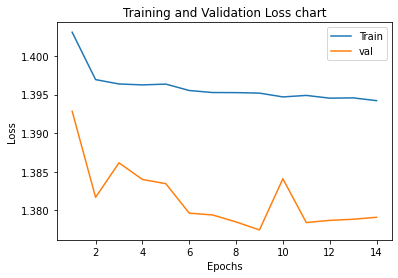

In [53]:
## plot the charts - loss - train -Val ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_loss_train = train_loss_tracker.copy()
y_pts_loss_val = val_loss_tracker.copy()
x_pts = [x for x in range(1,len(y_pts_loss_val)+1)]

plt.plot(x_pts,y_pts_loss_train)
plt.plot(x_pts,y_pts_loss_val)

plt.title('Training and Validation Loss chart')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'val'])
plt.show()

## Multimodal analysis

In [56]:
from torch import nn
from transformers import DistilBertModel

class MultimodalClassifier(nn.Module):

    def __init__(self, dropout=0.1):
        super(MultimodalClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.pre_classifier = nn.Linear(768, 768)
        self.relu = nn.ReLU()
        
        self.resnet50 = models.resnet50(pretrained=True)
        self.resnet50.fc = nn.Sequential(
               nn.Linear(2048, 2048),
               nn.ReLU(inplace=True))
        
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(768+2048, 1024)
        
        self.classifier_humour = nn.Linear(1024, 4)
        self.classifier_sarcasm = nn.Linear(1024, 4)
        self.classifier_offensive = nn.Linear(1024, 4)
        self.classifier_motivational = nn.Linear(1024, 2)
        self.classifier_sentiment = nn.Linear(1024, 5)

    def forward(self, input_id, mask, img):

        distilbert_output = self.distilbert(input_ids= input_id, attention_mask=mask,return_dict=False)
        
        hidden_state = distilbert_output[0]  # (bs, seq_len, dim)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        
        pooled_output = self.pre_classifier(pooled_output)  # (bs, dim)
        pooled_output = self.relu(pooled_output)  # (bs, dim)
        
        x = self.resnet50(img) # (bs, dim) 
        x = self.relu(x)  # (bs, dim)
        
        combined_output =  torch.cat((pooled_output,x), -1) ## concatenating the tensors(bs, (img_dim + text_dim))
        
        combined_output = self.dropout(combined_output)  # (bs, dim)
        combined_output = self.fc1(combined_output)
        combined_output = self.relu(combined_output)
        
        
        logits_humour = self.classifier_humour(combined_output)  # (bs, num_labels)
        logits_sarcasm = self.classifier_sarcasm(combined_output)
        logits_offensive = self.classifier_offensive(combined_output)
        logits_motivational = self.classifier_motivational(combined_output)
        logits_sentiment = self.classifier_sentiment(combined_output)

        return logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment

In [57]:
model = MultimodalClassifier().to(device)
criterion = criterion.to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [58]:
model

MultimodalClassifier(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Li

In [59]:
## Counting the number of model parameters ##

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of parameters : ', count_parameters(model))

Number of parameters :  97561939


In [60]:
from torch.optim import Adam
from tqdm import tqdm


def train(model, train_dataloader, val_dataloader, epochs, criterion, optimizer, device):
    
    prev_val_loss = 0
    
    ## Tracking the accuracy and losses for plotting ##
    
    train_loss_tracker = []
    val_loss_tracker = []
    
    train_value_tracker = {'humour':[], 'sarcasm': [], 'off':[], 'moti':[], 'senti':[]}
    val_value_tracker = {'humour':[], 'sarcasm': [], 'off':[], 'moti':[], 'senti':[]}
            
    early_stopping = EarlyStopping()
    
    #model = model.to(device)
    model.train()
    
    for epoch_num in range(epochs):
        train_items_total = 0
        val_items_total = 0
    
        total_acc_train_humour = 0
        total_acc_train_sarcasm = 0
        total_acc_train_off = 0
        total_acc_train_moti = 0
        total_acc_train_senti = 0

        total_acc_val_humour = 0
        total_acc_val_sarcasm = 0
        total_acc_val_off = 0
        total_acc_val_moti = 0
        total_acc_val_senti = 0

        total_loss_val = 0
        total_loss_train = 0

        for train_input, img_input, _, train_label_sentiment, train_label_humour, train_label_sarcasm, train_label_offensive, train_label_motivational in tqdm(train_dataloader):

            train_label_sentiment = train_label_sentiment.to(device)
            train_label_humour = train_label_humour.to(device)
            train_label_sarcasm = train_label_sarcasm.to(device)
            train_label_offensive = train_label_offensive.to(device)
            train_label_motivational = train_label_motivational.to(device)

            img_input = img_input.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            model=model.to(device) ## don't comment this line -- very important

            logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(input_id, mask, img_input)
            #print(output.shape)
            #print(train_label.long().shape)
            ##print(train_label.reshape(2,1).long().shape)

            batch_loss = criterion(logits_humour, train_label_humour.long()) + criterion(logits_sarcasm, train_label_sarcasm.long()) + criterion(logits_offensive, train_label_offensive.long()) + criterion(logits_motivational, train_label_motivational.long()) + criterion(logits_sentiment, train_label_sentiment.long())
            total_loss_train += batch_loss.item()

            acc_humour = (logits_humour.argmax(dim=1) == train_label_humour).sum().item()
            total_acc_train_humour += acc_humour
#             print(total_acc_train_humour)
#             print(acc_humour)

            acc_sarcasm = (logits_sarcasm.argmax(dim=1) == train_label_sarcasm).sum().item()
            total_acc_train_sarcasm += acc_sarcasm

            acc_off = (logits_offensive.argmax(dim=1) == train_label_offensive).sum().item()
            total_acc_train_off += acc_off

            acc_moti = (logits_motivational.argmax(dim=1) == train_label_motivational).sum().item()
            total_acc_train_moti += acc_moti

            acc_senti = (logits_sentiment.argmax(dim=1) == train_label_sentiment).sum().item()
            total_acc_train_senti += acc_senti
            
            ## number of training items in each batch ##
            train_items_total += train_label_humour.shape[0]
            #print(train_label_humour.shape[0])

            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        ## Eval ##

        model.eval()
        for train_input, img_input, _, val_label_sentiment, val_label_humour, val_label_sarcasm, val_label_offensive, val_label_motivational in val_dataloader:
            val_label_sentiment = val_label_sentiment.to(device)
            val_label_humour = val_label_humour.to(device)
            val_label_sarcasm = val_label_sarcasm.to(device)
            val_label_offensive = val_label_offensive.to(device)
            val_label_motivational = val_label_motivational.to(device)

            img_input = img_input.to(device)
            mask = train_input['attention_mask'].to(device)
            input_id = train_input['input_ids'].squeeze(1).to(device)

            with torch.no_grad():
                logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(input_id, mask, img_input)

            batch_loss = criterion(logits_humour, val_label_humour.long()) + criterion(logits_sarcasm, val_label_sarcasm.long()) + criterion(logits_offensive, val_label_offensive.long()) + criterion(logits_motivational, val_label_motivational.long()) + criterion(logits_sentiment, val_label_sentiment.long())
            total_loss_val += batch_loss.item()

            acc_humour = (logits_humour.argmax(dim=1) == val_label_humour).sum().item()
            total_acc_val_humour += acc_humour
            #print(total_acc_val_humour)

            acc_sarcasm = (logits_sarcasm.argmax(dim=1) == val_label_sarcasm).sum().item()
            total_acc_val_sarcasm += acc_sarcasm

            acc_off = (logits_offensive.argmax(dim=1) == val_label_offensive).sum().item()
            total_acc_val_off += acc_off

            acc_moti = (logits_motivational.argmax(dim=1) == val_label_motivational).sum().item()
            total_acc_val_moti += acc_moti

            acc_senti = (logits_sentiment.argmax(dim=1) == val_label_sentiment).sum().item()
            total_acc_val_senti += acc_senti
            
            ## number of validation items in each batch ##
            val_items_total += val_label_humour.shape[0]

        print(
            f'Epochs: {epoch_num + 1} \n | Train Loss: {total_loss_train / train_items_total: .3f} \n\n \
            | Train Accuracy (Humour): {total_acc_train_humour / train_items_total: .3f} \n \
            | Train Accuracy (Sarcasm): {total_acc_train_sarcasm / train_items_total: .3f} \n \
            | Train Accuracy (Offensive): {total_acc_train_off / train_items_total: .3f} \n \
            | Train Accuracy (Motivational): {total_acc_train_moti / train_items_total: .3f} \n \
            | Train Accuracy (Overall Sentiment): {total_acc_train_senti / train_items_total: .3f} \n \n \n \
            | Val Loss: {total_loss_val / val_items_total: .3f} \n\n \
            | Val Accuracy (Humour): {total_acc_val_humour / val_items_total: .3f} \n\
            | Val Accuracy (Sarcasm): {total_acc_val_sarcasm / val_items_total: .3f} \n\
            | Val Accuracy (Offensive): {total_acc_val_off / val_items_total: .3f} \n\
            | Val Accuracy (Motivational): {total_acc_val_moti / val_items_total: .3f} \n\
            | Val Accuracy (Overall Sentiment): {total_acc_val_senti / val_items_total: .3f} \n\n\n')

        ## Adding to the list for plotting ##
        train_loss_tracker.append(total_loss_train / train_items_total) 
        val_loss_tracker.append(total_loss_val / val_items_total)

        train_value_tracker['humour'].append(total_acc_train_humour / train_items_total)
        train_value_tracker['sarcasm'].append(total_acc_train_sarcasm / train_items_total)
        train_value_tracker['off'].append(total_acc_train_off / train_items_total)
        train_value_tracker['moti'].append(total_acc_train_moti / train_items_total)
        train_value_tracker['senti'].append(total_acc_train_senti / train_items_total)

        val_value_tracker['humour'].append(total_acc_val_humour / val_items_total)
        val_value_tracker['sarcasm'].append(total_acc_val_sarcasm / val_items_total)
        val_value_tracker['off'].append(total_acc_val_off / val_items_total)
        val_value_tracker['moti'].append(total_acc_val_moti / val_items_total)
        val_value_tracker['senti'].append(total_acc_val_senti / val_items_total)


        ## Early stopping ##

        if epoch_num != 0:
            early_stopping(prev_val_loss, total_loss_val / val_items_total)
            
            current_val_loss = total_loss_val / val_items_total ## recently updated only in multimodal part
            if current_val_loss < prev_val_loss: # if current value is less than the previous value
                prev_val_loss = current_val_loss

        elif epoch_num == 0:
            prev_val_loss = total_loss_val / val_items_total

        if early_stopping.early_stop:
            print("Training stopped at epoch:", epoch_num+1)
            break
                    
    return train_loss_tracker, val_loss_tracker, train_value_tracker, val_value_tracker

In [61]:
epochs = 15
lr = 1e-4 ## lr changed for multimodal model

optimizer = Adam(model.parameters(), lr= lr)

train_loss_tracker, val_loss_tracker, train_value_tracker, val_value_tracker = train(model, train_dataloader, val_dataloader, epochs, criterion, optimizer, device)

100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [08:07<00:00,  2.86it/s]


Epochs: 1 
 | Train Loss:  1.409 

             | Train Accuracy (Humour):  0.340 
             | Train Accuracy (Sarcasm):  0.497 
             | Train Accuracy (Offensive):  0.375 
             | Train Accuracy (Motivational):  0.640 
             | Train Accuracy (Overall Sentiment):  0.441 
 
 
             | Val Loss:  1.388 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [08:15<00:00,  2.82it/s]


Epochs: 2 
 | Train Loss:  1.399 

             | Train Accuracy (Humour):  0.339 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.386 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.380 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 





100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [08:15<00:00,  2.82it/s]


Epochs: 3 
 | Train Loss:  1.397 

             | Train Accuracy (Humour):  0.343 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.391 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.381 

             | Val Accuracy (Humour):  0.305 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  1


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [08:15<00:00,  2.82it/s]


Epochs: 4 
 | Train Loss:  1.398 

             | Train Accuracy (Humour):  0.339 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.380 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.383 

             | Val Accuracy (Humour):  0.364 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  2


100%|██████████████████████████████████████████████████████████████████████████████| 1397/1397 [08:14<00:00,  2.83it/s]


Epochs: 5 
 | Train Loss:  1.396 

             | Train Accuracy (Humour):  0.347 
             | Train Accuracy (Sarcasm):  0.499 
             | Train Accuracy (Offensive):  0.390 
             | Train Accuracy (Motivational):  0.646 
             | Train Accuracy (Overall Sentiment):  0.450 
 
 
             | Val Loss:  1.383 

             | Val Accuracy (Humour):  0.305 
            | Val Accuracy (Sarcasm):  0.537 
            | Val Accuracy (Offensive):  0.384 
            | Val Accuracy (Motivational):  0.650 
            | Val Accuracy (Overall Sentiment):  0.457 



Early stopping counter value:  3
Training stopped at epoch: 5


In [62]:
from sklearn.metrics import classification_report

def test(model, test_dataloader, criterion, optimizer, device):
    total_acc_test_humour = 0
    total_acc_test_sarcasm = 0
    total_acc_test_off = 0
    total_acc_test_moti = 0
    total_acc_test_senti = 0

    total_loss_test = 0
    
    ## total test items in a dataloader ##
    test_items_total = 0
    
    model = model.to(device)
    model.eval()
    
    img_lst =[]
    predicted_labels_lst_hum=[]
    orig_labels_lst_hum=[]
    
    predicted_labels_lst_sar=[]
    orig_labels_lst_sar=[]
    
    predicted_labels_lst_moti=[]
    orig_labels_lst_moti=[]
    
    predicted_labels_lst_off=[]
    orig_labels_lst_off=[]
    
    predicted_labels_lst_senti=[]
    orig_labels_lst_senti=[]
    
    for test_input, img_input, img_names, test_label_sentiment, test_label_humour, test_label_sarcasm, test_label_offensive, test_label_motivational in test_dataloader:
        test_label_sentiment = test_label_sentiment.to(device)
        test_label_humour = test_label_humour.to(device)
        test_label_sarcasm = test_label_sarcasm.to(device)
        test_label_offensive = test_label_offensive.to(device)
        test_label_motivational = test_label_motivational.to(device)
        
        mask = test_input['attention_mask'].to(device)
        input_id = test_input['input_ids'].squeeze(1).to(device)

        img_input = img_input.to(device)

        with torch.no_grad():
            logits_humour, logits_sarcasm, logits_offensive, logits_motivational, logits_sentiment = model(input_id, mask, img_input)
            
        img_lst.extend(list(img_names))
#         print(test_label_sentiment.tolist())
#         print(logits_humour.argmax(dim=1).tolist())
#         print(img_names)
        
        predicted_labels_lst_hum.extend(logits_humour.argmax(dim=1).tolist())
        orig_labels_lst_hum.extend(test_label_humour.tolist())
        
        predicted_labels_lst_sar.extend(logits_sarcasm.argmax(dim=1).tolist())
        orig_labels_lst_sar.extend(test_label_sarcasm.tolist())

        predicted_labels_lst_moti.extend(logits_motivational.argmax(dim=1).tolist())
        orig_labels_lst_moti.extend(test_label_motivational.tolist())

        predicted_labels_lst_off.extend(logits_offensive.argmax(dim=1).tolist())
        orig_labels_lst_off.extend(test_label_offensive.tolist())

        predicted_labels_lst_senti.extend(logits_sentiment.argmax(dim=1).tolist())
        orig_labels_lst_senti.extend(test_label_sentiment.tolist())
        
        batch_loss = criterion(logits_humour, test_label_humour.long()) + criterion(logits_sarcasm, test_label_sarcasm.long()) + criterion(logits_offensive, test_label_offensive.long()) + criterion(logits_motivational, test_label_motivational.long()) + criterion(logits_sentiment, test_label_sentiment.long())
        total_loss_test += batch_loss.item()

        acc_humour = (logits_humour.argmax(dim=1) == test_label_humour).sum().item()
        total_acc_test_humour += acc_humour

        acc_sarcasm = (logits_sarcasm.argmax(dim=1) == test_label_sarcasm).sum().item()
        total_acc_test_sarcasm += acc_sarcasm

        acc_off = (logits_offensive.argmax(dim=1) == test_label_offensive).sum().item()
        total_acc_test_off += acc_off

        acc_moti = (logits_motivational.argmax(dim=1) == test_label_motivational).sum().item()
        total_acc_test_moti += acc_moti

        acc_senti = (logits_sentiment.argmax(dim=1) == test_label_sentiment).sum().item()
        total_acc_test_senti += acc_senti
        
        ## number of test items in each batch ##
        test_items_total += test_label_humour.shape[0]

    print(
        f'| Test Loss: {total_loss_test / test_items_total: .3f} \n\n \
        | Test Accuracy (Humour): {total_acc_test_humour / test_items_total: .3f} \n\
        | Test Accuracy (Sarcasm): {total_acc_test_sarcasm / test_items_total: .3f} \n\
        | Test Accuracy (Offensive): {total_acc_test_off / test_items_total: .3f} \n\
        | Test Accuracy (Motivational): {total_acc_test_moti / test_items_total: .3f} \n\
        | Test Accuracy (Overall Sentiment): {total_acc_test_senti / test_items_total: .3f} \n\n\n')
    
    print('\n\n*********************Classification report***************\n\n')
    print('Humour:')
    print(classification_report(orig_labels_lst_hum, predicted_labels_lst_hum))
    print('Sarcasm:')
    print(classification_report(orig_labels_lst_sar, predicted_labels_lst_sar))
    print('Offensive:')
    print(classification_report(orig_labels_lst_off, predicted_labels_lst_off))
    print('Motivational:')
    print(classification_report(orig_labels_lst_moti, predicted_labels_lst_moti))
    print('Overall Sentiment:')
    print(classification_report(orig_labels_lst_senti, predicted_labels_lst_senti))

In [63]:
test(model, test_dataloader, criterion, optimizer, device)

| Test Loss:  1.406 

         | Test Accuracy (Humour):  0.318 
        | Test Accuracy (Sarcasm):  0.484 
        | Test Accuracy (Offensive):  0.389 
        | Test Accuracy (Motivational):  0.654 
        | Test Accuracy (Overall Sentiment):  0.408 





*********************Classification report***************


Humour:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.00      0.00      0.00       240
           2       0.32      1.00      0.48       222
           3       0.00      0.00      0.00        75

    accuracy                           0.32       699
   macro avg       0.08      0.25      0.12       699
weighted avg       0.10      0.32      0.15       699

Sarcasm:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.48      1.00      0.65       338
           2       0.00      0.00      0.00       170
           3

In [64]:
### Saving the model ###

torch.save(model, './multimodal_model.pt')

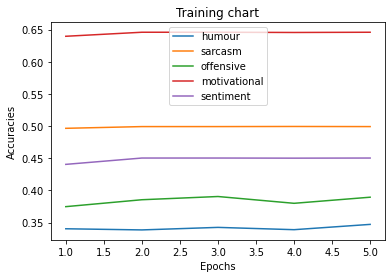

In [65]:
### charts ###

## plot the charts - Accuracies -Train ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_hum = train_value_tracker['humour'].copy()
y_pts_sar = train_value_tracker['sarcasm'].copy()
y_pts_off = train_value_tracker['off'].copy()
y_pts_moti = train_value_tracker['moti'].copy()
y_pts_senti = train_value_tracker['senti'].copy()

x_pts = [x for x in range(1,len(y_pts_hum)+1)]

plt.plot(x_pts,y_pts_hum)
plt.plot(x_pts,y_pts_sar)
plt.plot(x_pts,y_pts_off)
plt.plot(x_pts,y_pts_moti)
plt.plot(x_pts,y_pts_senti)

plt.title('Training chart')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(['humour', 'sarcasm', 'offensive', 'motivational', 'sentiment'])
plt.show()

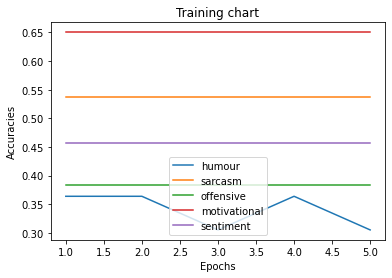

In [66]:
## plot the charts - Accuracies -Val ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_hum = val_value_tracker['humour'].copy()
y_pts_sar = val_value_tracker['sarcasm'].copy()
y_pts_off = val_value_tracker['off'].copy()
y_pts_moti = val_value_tracker['moti'].copy()
y_pts_senti = val_value_tracker['senti'].copy()

x_pts = [x for x in range(1,len(y_pts_hum)+1)]

plt.plot(x_pts,y_pts_hum)
plt.plot(x_pts,y_pts_sar)
plt.plot(x_pts,y_pts_off)
plt.plot(x_pts,y_pts_moti)
plt.plot(x_pts,y_pts_senti)

plt.title('Training chart')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend(['humour', 'sarcasm', 'offensive', 'motivational', 'sentiment'])
plt.show()

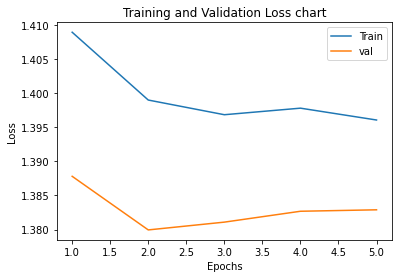

In [67]:
## plot the charts - loss - train -Val ##

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


y_pts_loss_train = train_loss_tracker.copy()
y_pts_loss_val = val_loss_tracker.copy()
x_pts = [x for x in range(1,len(y_pts_loss_val)+1)]

plt.plot(x_pts,y_pts_loss_train)
plt.plot(x_pts,y_pts_loss_val)

plt.title('Training and Validation Loss chart')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'val'])
plt.show()